<a href="https://colab.research.google.com/github/valarmathi729/Machine-learning/blob/main/DECISION_TREE_EXP1_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving Loan Prediction Data.csv to Loan Prediction Data (1).csv
Accuracy: 0.7723577235772358
Loan Prediction: Approved


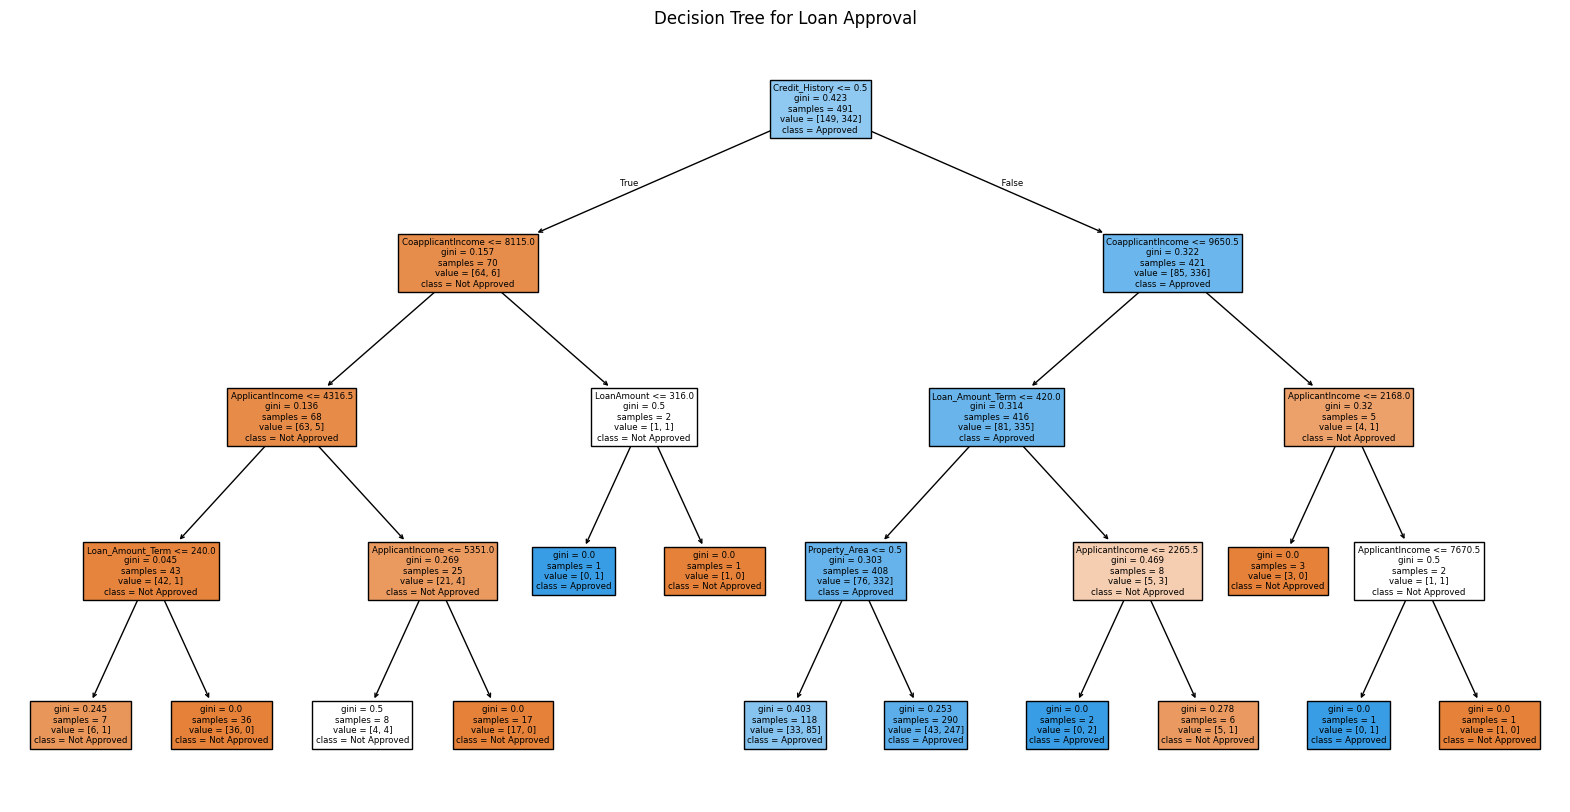

In [ ]:
# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from google.colab import files

# Load dataset
df = pd.read_csv(files.upload().popitem()[0])

# Clean data
df.drop('Loan_ID', axis=1, inplace=True)
df.fillna({col: df[col].mode()[0] if df[col].dtype == 'object' else df[col].median() for col in df}, inplace=True)

# Encode categorical variables
le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])

# Split data
X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = DecisionTreeClassifier(random_state=42, max_depth=4)
model.fit(X_train, y_train)

# Evaluate model
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

# Predict new sample
sample = pd.DataFrame([{
    'Gender': 'Male', 'Married': 'Yes', 'Dependents': '1', 'Education': 'Graduate',
    'Self_Employed': 'No', 'ApplicantIncome': 5000, 'CoapplicantIncome': 2000,
    'LoanAmount': 150, 'Loan_Amount_Term': 360, 'Credit_History': 1.0, 'Property_Area': 'Urban'
}])

# Encode sample
for col in sample.select_dtypes(include='object').columns:
    sample[col] = le.fit_transform(sample[col])

# Predict
prediction = model.predict(sample)[0]
print("Loan Prediction:", "Approved" if prediction == 1 else "Not Approved")

# ✅ Visualize the Decision Tree
plt.figure(figsize=(20,10))
plot_tree(model, feature_names=X.columns, class_names=['Not Approved', 'Approved'], filled=True)
plt.title("Decision Tree for Loan Approval")
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn import tree
import seaborn as sns
from google.colab import files

# Upload the dataset
print("Please upload the LoanApprovalPrediction.csv file.")
uploaded = files.upload()

# Load the dataset
data = pd.read_csv('LoanApprovalPrediction.csv')

# Data Preprocessing
# Handle missing values
data['LoanAmount'] = data['LoanAmount'].replace('', np.nan).astype(float).fillna(data['LoanAmount'].median())
data['Loan_Amount_Term'] = data['Loan_Amount_Term'].replace('', np.nan).astype(float).fillna(data['Loan_Amount_Term'].median())
data['Credit_History'] = data['Credit_History'].replace('', np.nan).astype(float).fillna(data['Credit_History'].mode()[0])
data['Gender'] = data['Gender'].fillna(data['Gender'].mode()[0])
data['Married'] = data['Married'].fillna(data['Married'].mode()[0])
data['Dependents'] = data['Dependents'].replace('3+', '3').fillna(data['Dependents'].mode()[0])
data['Self_Employed'] = data['Self_Employed'].fillna(data['Self_Employed'].mode()[0])

# Encode categorical variables
le = LabelEncoder()
categorical_cols = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']
for col in categorical_cols:
    data[col] = le.fit_transform(data[col])

# Convert Dependents to numeric
data['Dependents'] = data['Dependents'].astype(int)

# Define features and target
X = data.drop(['Loan_ID', 'Loan_Status'], axis=1)
y = data['Loan_Status']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Decision Tree model
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions
y_pred = dt_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Rejected', 'Approved'], yticklabels=['Rejected', 'Approved'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Visualize the Decision Tree
plt.figure(figsize=(20, 10))
tree.plot_tree(dt_model, feature_names=X.columns, class_names=['Rejected', 'Approved'], filled=True)
plt.title('Decision Tree for Loan Approval Prediction')
plt.show()

Please upload the LoanApprovalPrediction.csv file.
